<a href="https://colab.research.google.com/github/NADA200/n-breast-cancer/blob/main/Copy_of_%D9%86%D8%B3%D8%AE%D8%A9_%D9%85%D9%86_nada_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # linear algebra
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import random
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from PIL import Image

#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
class can_model:
    def __init__(self):
        self.batch_size = 32
        self.img_height = 224
        self.img_width = 224
        self.epochs = 5
        return

    def run_model(self):
        self.read_training_data('/content/drive/Othercomputers/My Laptop/train')
        #self.plot_random_sample()
        self.prepare_training_data()
        self.build_model()
        self.compile_model()
        self.fit_model()
        #self.plot_result()

    def read_training_data(self, path):
        self.data_dir = pathlib.Path(path)
        self.class_names = np.array([sorted(item.name for item in self.data_dir.glob("*"))])
        print("HERE")
        print(self.class_names)
        return

    def plot(self, path,class_name):
        print(path)
        plt.figure(figsize=(8,8))

        img = plt.imread(path)

        plt.xticks([])
        plt.yticks([])
        plt.title("Class Name: "+class_name)
        plt.imshow(img)


    def prepare_training_data(self):
        self.train_data = image_dataset_from_directory(
                          self.data_dir,
                          validation_split=0.2,
                          subset="training",
                          seed=123,
                          image_size=(self.img_height, self.img_width),
                          batch_size=self.batch_size)
        self.val_data = image_dataset_from_directory(self.data_dir,
                                                validation_split=0.2,
                                                subset="validation",
                                                seed=123,
                                                image_size=(self.img_height, self.img_width),
                                                batch_size=self.batch_size)
        return

    def build_model(self):
        self.model = tf.keras.Sequential([

           layers.Rescaling(1./255, input_shape=(self.img_height, self.img_width, 3)),

          layers.Conv2D(16, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),

          layers.Conv2D(32, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),

          layers.Conv2D(64, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),

          layers.Dropout(0.5),
          layers.Flatten(),

          layers.Dense(128, activation='relu'),
          layers.Dense(2,activation="softmax")
        ])
        return

    def compile_model(self):
        #Compile the model
        self.model.compile(optimizer="Adam",
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=["accuracy"])
        #Fit the model
    def fit_model(self):
        self.history = self.model.fit(self.train_data,
                            epochs=self.epochs,
                            validation_data=self.val_data,
                            batch_size=self.batch_size)
    def plot_result(self):
        # Plot the result
        acc = self.history.history['accuracy']
        val_acc =  self.history.history['val_accuracy']

        loss = self.history.history['loss']
        val_loss = self.history.history['val_loss']

        epochs_range = range(self.epochs)

        plt.figure(figsize=(8,8))
        plt.subplot(1,2,1)
        plt.plot(epochs_range,acc,label='Accuracy')
        plt.plot(epochs_range,val_acc,label="Validation Accuracy")
        plt.legend()

        plt.subplot(1,2,2)
        plt.plot(epochs_range,loss,label='Loss')
        plt.plot(epochs_range,val_loss,label="Validation Loss")
        plt.legend()
        plt.show()
        return
    def predict(self, path):
        data_dir = pathlib.Path(path)
        value_data = image_dataset_from_directory(data_dir,
                                            validation_split=0.2,
                                            subset="validation",
                                            seed=123,
                                            image_size=(224,224),
                                            batch_size=32)


        #plt.figure(figsize=(20, 20))
        result = ' | True'
        #imageCount = len(list(data_dir.glob(".jpg") ))
        #number_of_images = len(np.concatenate([i for x, i in value_data], axis=0))
        for images, labels in value_data.take(1):
            for i in range(1):
                ax = plt.subplot(5, 5, i + 1)
                img = images[i].numpy().astype("uint8")
                img = tf.expand_dims(img, axis=0)
                predictions = self.model.predict(img)
                predicted_class = np.argmax(predictions)
                if self.class_names[0][predicted_class] == self.class_names[0][labels[i]]:
                    result = ' | True'
                im = Image.fromarray(images[i].numpy().astype("uint8"))
                im.save("test.png")
                #plt.imshow(images[i].numpy().astype("uint8"))
                #plt.title(value_data.class_names[predicted_class]+result  )
                #plt.axis("off")
        return self.class_names[0][predicted_class]
















**NumPy** is a powerful Python library for scientific computing that is commonly used in image classification tasks. Here are some reasons why:

NumPy provides efficient multi-dimensional arrays for storing and manipulating large datasets, which is essential for processing and analyzing images.

It offers a wide range of mathematical functions and operations, such as element-wise multiplication, addition, subtraction, division, and matrix multiplication, that are required for image processing and feature extraction.

NumPy can be easily integrated with other Python libraries used in image classification, such as OpenCV, Scikit-learn, and Keras.

NumPy provides fast and efficient numerical operations on arrays, which can significantly reduce the processing time required for training machine learning models on image datasets.

Overall, NumPy is an indispensable tool in image classification, providing a solid foundation for data manipulation and analysis.
Matplotlib is a Python library for data visualization, and it can be useful in image classification for several reasons:

**Matplotlib** can be used to display images and graphical representations related to the classification process. For example, it can be used to show correctly classified images and misclassified images.

Matplotlib can be used to visualize changes in the performance of the classification model during training. This can help improve the model and estimate its performance.

Matplotlib can be used to show the errors that result from image classification. It can be used to analyze the causes of errors and improve the model in the future.

Matplotlib can be used to display the parameters used in image classification, which can help understand how the model works and improve it.

Overall, Matplotlib is a powerful and useful library in image classification, allowing users to display and analyze data in different ways.
TensorFlow is a popular Python library for artificial intelligence that can be used for training machine learning models, and it can be useful in image classification for several reasons:

**TensorFlow** provides an easy-to-use API for training and deploying machine learning models.

TensorFlow can be used to develop deep learning models, which are highly effective for image classification.

TensorFlow provides a wide range of functions that can be used for image analysis and processing, as well as fine-tuning and optimization of machine learning models.

TensorFlow can handle large datasets and train machine learning models on a large number of images.

Overall, TensorFlow is one of the best choices for developing and training machine learning models used in image classification, providing many tools and functions that facilitate image analysis and processing.
The Pathlib library is a Python library for working with file paths and directories, and it can be useful in image classification for several reasons:

**Pathlib** can be used to access the directories containing the training, validation, and testing images.

Pathlib can be used to access individual image files within directories and load them into memory.

Pathlib can be used to create new directories and store images in them.

Pathlib can be used to ensure that the required image files are present in the directories, and it can also be used to separate the files resulting from the training, validation, and testing processes.

Overall, Pathlib is a useful library in image classification as it allows users to work with file paths and directories, load and store images, and manage the data required for image classification.
The** Random library** can be used in image classification for several reasons:

1. Random can be used to create random samples of images, allowing for the creation of new testing data.

2. Random can be used to determine the number of images that will be used in each epoch during training, improving the performance of the model and reducing training time.

3. Random can be used to create samples of data that differ from the data used in training, to test the model's ability to handle unknown data.

4. Random can also be used to shuffle the order of training, testing, and validation data, preventing bias or patterns from impacting training.

Overall, the Random library is useful in image classification for creating random testing sets, determining the number of images used in each epoch, increasing diversity in training data, and preventing bias during training.
The Keras library is commonly used in image classification for several reasons:

1.** Keras** provides a user-friendly interface for building and training machine learning models, including image classification.

2. Keras can be used to build neural network models, which are among the most effective methods for image classification.

3. Keras offers a wide range of tools and functions, such as optimizers, layers, and prediction functions, that make it easy to create and train image classification models.

4. Keras can be used to fine-tune and modify machine learning models, such as making changes to the number of layers or parameters that need adjustment.

5. Keras can run model training in parallel across multiple processors, improving model performance.

Overall, Keras is one of the best options for image classification due to its user-friendly interface and the many tools and functions available for building and training image classification models.
The **utilities** library or toolkit is used in image classification for several reasons, including:

1. Saving time and effort: Using utilities helps to classify images faster and more accurately, saving a lot of time and effort.

2. Improving accuracy: The tools used in image classification rely on advanced techniques such as machine learning, artificial intelligence, and others, which increases the accuracy of the results.

3. Improving organization: Utilities can be used to classify images and organize them into groups and categories based on their sizes, colors, subjects, and other criteria, making it easier to manage and organize large collections of images.

4. Improving filtering: Utilities allow for filtering and sorting images based on various criteria such as size, color, title, and others, making it easier to manage images and find the ones that are needed.
**Layers** are used in image classification because they allow the neural network to learn complex patterns and features within an image. Each layer of a neural network performs a specific operation on the input data, such as convolution, pooling, or activation. By stacking multiple layers together, the network can learn increasingly complex representations of the input images.

The first few layers of a neural network typically detect basic features such as edges and corners, while deeper layers detect more complex structures like shapes and textures. This hierarchical representation allows the network to classify images with high accuracy.

Moreover, using more layers in a neural network can also help to prevent overfitting, which is when the model memorizes the training data instead of learning to generalize to new data. By increasing the number of layers, the model can learn more abstract representations that are less likely to be specific to the training data.
**Convolutional** neural networks (CNNs) use convolution to perform image classification because it allows for efficient analysis of the image content. This process uses a set of filters (kernels) to extract important information from the image, and aggregates it so that the salient and relevant features are represented.

Convolution is the foundation of artificial neural networks used in image classification because it permits multi-dimensional analysis of images, where multiple filters are applied to analyze different aspects of the image.

Additionally, convolution also allows for reducing the size of the data required to represent the image, making the process more memory-efficient and faster.
Pooling is used in image classification to reduce the spatial dimensions of the feature maps produced by convolutional layers. The main reason for using pooling is to decrease the computational complexity of the network while retaining important features.

**Pooling** can also help to extract important features from the input image, and it is usually performed after the convolutional layer. This is because the convolutional layer extracts features that are sensitive to small variations in the input image, but these features might not be invariant to larger transformations such as translation, rotation, or scaling. Pooling helps to make the learned features more robust to these types of transformations by summarizing the output of a group of neurons into a single value.

Pooling operates by dividing the input image into non-overlapping regions, and then summarizing each region with a single value. The most common way of performing pooling is by taking the maximum value within each region (max-pooling). Other types of pooling, such as average pooling or L2-norm pooling, can also be used depending on the specific application and the desired properties of the learned features.

**Activation** functions are used in image classification to highlight important information in an image and focus on areas that may contain significant information for the purpose of image discrimination. Generally, activation functions are used in artificial neural networks (NN) to activate neurons and determine which neurons will pass on information to the next layer.

During the training of an NN model, activation functions are used to improve the efficiency of the model in learning important information in images and improving classification accuracy. Activation functions such as ReLU, Sigmoid, and Softmax are typically used in image classification.

In summary, activation functions are essential in the process of image classification because they help to extract relevant features from images, providing a more accurate representation of the object being classified.

**The Python Imaging Library (PIL)** is a popular library used for image processing and manipulation in Python, including image classification tasks. PIL provides a comprehensive set of tools for opening, manipulating, and saving many different image file formats.

One common use of PIL in image classification is to preprocess the images before feeding them into a neural network model. This can involve operations such as resizing, cropping, normalizing pixel values, and converting the image to a format that is compatible with the model input.

PIL also allows for transformations such as rotation, flipping, and color adjustments, which can be useful for augmenting the training data to improve model performance and prevent overfitting. Additionally, PIL provides functions for adding annotations or labels to images, which can be useful for visualizing the results of the classification process.

In summary, PIL is used in image classification to manipulate and preprocess images before they are fed into a neural network model, transform images to augment training data, and add annotations to images for visualization purposes.

The **"os"** module in Python is used for various operating system-related tasks, such as manipulating files, directories, and paths. In image classification, the "os" module is often used to navigate through directories containing large amounts of image data.

One common use case is when organizing training and testing data for a machine learning model. The images are typically stored in different folders based on their corresponding classes or labels. The "os" module can be used to traverse through these folders, read the images, and preprocess them before feeding into the model.

Additionally, the "os" module can be used to create new directories to store processed images, create logs to record important information during training, and perform other file operations related to the image classification task.

In summary, the "os" module is useful in image classification for navigating through directories containing image data, organizing and preprocessing the data, creating new directories, and performing other file operations related to the image classification task.

This line of code is used to set an environment variable named "**TF_CPP_MIN_LOG_LEVEL**" in Python, specifically for the TensorFlow library. Setting the value to '2' indicates that TensorFlow will only display warning messages and suppress any other type of informational or debug messages.

This can be useful when running TensorFlow code and you do not want to see a lot of output in your console or logs. It can also help in cases where you are running TensorFlow on a system with limited resources, as it reduces the amount of overhead generated by logging messages.

In summary, this line of code is setting an environment variable to control the verbosity level of TensorFlow's logging messages.

The __**init**__ method is a special method in Python that gets called automatically when we create a new instance of the class. The** self **parameter refers to the instance of the class being created, and allows us to access and modify its attributes.

**`self.compile_model()` **is a function that is used in many machine learning frameworks, especially in TensorFlow, to prepare the model for training. This function is generally called to specify the optimizer algorithm, loss function, and metrics to be used during the training process.

In short, `self.compile_model()` prepares the model for training, which helps to facilitate the training process and ensure better results.

**`self.fit_model()**` is a function used to train the model on the training data. The purpose of this function is to execute the actual training process on the training data, adjust the weights and biases within the model to improve its performance, and evaluate the results using the metrics defined in the `self.compile_model()` function.

By using `self.fit_model()`, users can specify the batch size and number of epochs, as well as set a validation set to evaluate the model's performance during training.

Overall, `self.fit_model()` is a very important function in training the model and improving its performance, helping to obtain accurate and reliable results from the model.

#self.class_names = np.array([sorted(item.name for item in self.data_dir.glob("*"))])
This line of code creates a NumPy array called class_names containing the names of subdirectories found within the data_dir directory. Each element of the array represents the name of a class or category that the model will learn to classify images into.

The glob method is used to find all subdirectories within data_dir, and the sorted function ensures that the class names are in alphabetical order. The resulting array is wrapped in another array using the np.array function, which is necessary for compatibility with certain NumPy operations.



In Python,** `def`** is a keyword used to define a function. When you use `def` followed by a function name and a set of parentheses, you are telling Python that you want to create a new function with the given name and parameters.

Functions are an essential part of any programming language, including Python. They allow you to break your code into reusable modules, making it easier to read, write, and maintain. By defining a function using `def`, you can give it a name and a set of input parameters, and then reuse that function throughout your program as often as necessary.

The `def` keyword is an important building block for creating modular, organized, and efficient Python programs. Without it, coding in Python would be much more difficult and time-consuming.

The code **plt.xticks([]) and plt.yticks([])** are used in Python's Matplotlib library to remove the tick marks on both the x-axis and y-axis of a plot.

When you call these functions with an empty list as an argument, it removes the tick labels from the plot and makes it look cleaner. This can be useful when you want to focus the viewer's attention on the data being presented rather than the axis tick marks.

**plt.title("Class Name: "+class_name)**

This line of code sets the title of a plot to include the name of a class. The title will be displayed at the top of the plot and will help provide context for the data being visualized.

The variable class_name is likely a string that contains the name of the class being plotted. By concatenating this string with the text "Class Name: ", we create a more informative title for the plot

** def plot_random_sample(self)**:
In data analysis and visualization, it is often useful to plot a random sample of data to get an understanding of the overall distribution and characteristics of the dataset. This is especially important when dealing with large datasets, where plotting the entire dataset may be impractical or computationally expensive.

By using the plot_random_sample() function, you can generate a representative subset of your data for visualization purposes, which can help you identify patterns, outliers, and other insights that might not be immediately apparent from the raw data.

#Normalization of images is an important preprocessing step in image classification because it helps to bring the pixel values of an image into a similar range, which can help to improve the performance of deep learning models.

Firstly, normalization converts the pixel values from a large range (e.g., 0-255 for 8-bit images) to a small range (e.g., 0-1 or -1 to 1), which makes it easier for the model to learn the important features of the image. This is because when the distribution of pixel values is too wide, some activation functions may not be able to effectively process them, leading to poor performance.

Secondly, normalization helps to make the model training more stable and efficient by reducing the sensitivity to small changes in input values. This is because the weights of a neural network are updated based on the gradients computed during backpropagation, which could be very sensitive to input values that vary widely. Normalizing the input images makes the optimization process more stable and less prone to oscillations during training.

Overall, normalizing the input images helps to ensure that the model can effectively learn the important patterns in the data, leading to better performance and more accurate predictions.

 **layers.Rescaling(1./255, input_shape=(self.img_height, self.img_width, 3)**
layers.Rescaling(1./255) is a Keras layer that scales the pixel values of an image from [0, 255] to [0, 1]. This is often done as a preprocessing step before feeding images into a neural network.

input_shape=(self.img_height, self.img_width, 3) specifies the expected shape of the input image tensor. self.img_height and self.img_width are variables that hold the height and width of the input image respectively, while 3 indicates that the input should have 3 color channels (i.e., RGB).

Therefore, putting these together, this line of code defines a Rescaling layer that will scale the pixel values of an image from [0, 255] to [0, 1], and expects input images with height and width given by self.img_height and self.img_width, respectively, and with 3 color channels.

#layers.Conv2D(16, 3, padding='same', activation='relu'),



This line of code defines a Convolutional layer with 16 filters, each having a size of 3x3. The 'padding' argument is set to 'same', which means that the output volume will have the same spatial dimensions as the input volume. This is achieved by adding zero-padding to the borders of the input volume.



The activation function used in this layer is ReLU (Rectified Linear Unit), which is commonly used in neural networks due to its simplicity and effectiveness in preventing the vanishing gradient problem during backpropagation.



Together, this layer applies 16 convolutional filters with size 3x3 to the input image while preserving its spatial dimensions through padding, and applies the ReLU activation function to the output of each filter.

**`layers.Dropout(0.5)**` is a function commonly used in neural network architectures to prevent overfitting. It randomly drops out (sets to zero) a fraction of the input units with a probability of 0.5 during training. This forces the remaining units to learn more robust and generalizable representations of the data, ultimately improving performance on unseen data.

#`layers.Flatten()`is a function in the Keras API of TensorFlow library that flattens the input shape of a tensor. It takes the input tensor which has a shape of `(batch_size, units)` and converts it to a 1D array of size `(batch_size x units)`. This is often used as a pre-processing step before feeding the output to a fully connected layer. The `Flatten()` layer does not have any trainable parameters; it simply reshapes the input tensor.

`**#layers.Dense(128, activation='relu')** is a function in the Keras API of TensorFlow library that defines a fully connected layer with 128 units and applies the rectified linear unit (ReLU) activation function to the output. The `Dense()` layer represents a matrix multiplication between the input tensor and a weight matrix, followed by an addition of a bias vector and application of the specified activation function.

In other words, this layer takes the flattened input from the previous layer and applies a linear transformation to it, which is the multiplication of the input with the weight matrix and adding the bias vector. The ReLU function is then applied element-wise to the output of the linear transformation to introduce non-linearity to the model. This helps the neural network learn complex patterns and relationships in the data.

**Using two or more dense layers** in an image classification model can help to improve the accuracy of the model by allowing for more complex representations and interactions between features. The first dense layer can learn low-level representations of the input data, while the second dense layer can learn higher-level representations that combine these low-level features. This can be particularly useful when working with complex datasets where there are many different features or when trying to classify images with subtle differences. Additionally, using multiple dense layers can help to prevent overfitting by introducing regularization techniques such as dropout or L2 regularization. Overall, using two or more dense layers in an image classification model can be beneficial for improving model performance and accuracy.

Both **ReLU (Rectified Linear Unit) and Softmax** are activation functions that can be used in dense layers of neural networks. However, they differ in their specific applications and characteristics.

ReLU is a simple, nonlinear activation function that sets all negative input values to zero and passes positive input values through unchanged. This means that ReLU is a good choice for hidden layers in a neural network because it can help to alleviate the vanishing gradient problem by preventing backpropagation from getting stuck in regions with small gradients. ReLU is commonly used in convolutional neural networks (CNNs) as well as other types of neural networks.

On the other hand, Softmax is a type of activation function that is specifically designed for multi-class classification problems. Softmax takes a vector of arbitrary real-valued numbers as input and normalizes them into a probability distribution, where each element of the output represents the probability that the input belongs to a particular class. The sum of all probabilities adds up to 1.0, making Softmax ideal for predicting the class probabilities of an input.

In summary, ReLU is a general-purpose activation function that is useful for most types of neural networks and hidden layers, while Softmax is a specialized activation function that is designed specifically for multi-class classification problems.

#**Validation data **is an essential part of the training process in machine learning because it allows you to assess how well your model is performing. During the training phase, the model is adjusted based on the training data, and as a result, it can become overfitted to that data, meaning it becomes too specialized in recognizing specific patterns in the training dataset.

By comparing the model's performance on the validation dataset and the training dataset, you can detect if there is overfitting or underfitting. Overfitting occurs when the model performs well on the training data but does not generalize well to new data. On the other hand, underfitting happens when the model cannot capture the underlying patterns in the training data and hence cannot generalize well.

Therefore, using a separate validation dataset, we can evaluate the model's performance on unseen data and make adjustments to improve its overall accuracy and generalization ability. In summary, validation data is essential for preventing overfitting, ensuring model accuracy, and making sure that the model generalizes well to new data.

In [ ]:
can = can_model()
can.run_model()

HERE
[['benign' 'malign']]
Found 874 files belonging to 2 classes.
Using 700 files for training.
Found 874 files belonging to 2 classes.
Using 174 files for validation.
Epoch 1/5
22/22 [==============================] - 80s 3s/step - loss: 0.5173 - accuracy: 0.8557 - val_loss: 0.2483 - val_accuracy: 0.9310
Epoch 2/5
22/22 [==============================] - 46s 2s/step - loss: 0.1684 - accuracy: 0.9443 - val_loss: 0.1761 - val_accuracy: 0.9253
Epoch 3/5
22/22 [==============================] - 46s 2s/step - loss: 0.1273 - accuracy: 0.9514 - val_loss: 0.1545 - val_accuracy: 0.9655
Epoch 4/5
22/22 [==============================] - 46s 2s/step - loss: 0.0901 - accuracy: 0.9671 - val_loss: 0.1570 - val_accuracy: 0.9540
Epoch 5/5
22/22 [==============================] - 48s 2s/step - loss: 0.0631 - accuracy: 0.9771 - val_loss: 0.1257 - val_accuracy: 0.9713


Found 1 files belonging to 2 classes.
Using 0 files for validation.
1/1 [==============================] - 0s 39ms/step
malign


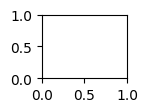

In [ ]:
#To Test The Model
#We need two folders inside the test folder, in one of the two folders, we put the test image
#The other folder Should be empty

path = "/content/drive/MyDrive/MalTest" #Malignant
print(can.predict(path))

Found 1 files belonging to 2 classes.
Using 0 files for validation.
1/1 [==============================] - 0s 26ms/step
benign


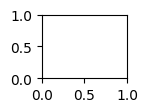

In [ ]:
path = "/content/drive/MyDrive/HealtyTest" #benign
print(can.predict(path))